# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruting_costs`, `salary_grid`.

## Содержание

### [1. Описание штата сотрудников](#Описание-штата-сотрудников)
- [Таблицы в базе данных](#Таблицы-в-базе-данных)
- [Поля таблицы hr_dataset](#Поля-таблицы-hr_dataset)
- [Поля таблицы production_staff](#Поля-таблицы-production_staff)
- [Поля таблицы recruiting_costs](#Поля-таблицы-recruiting_costs)
- [Поля таблицы salary_grid](#Поля-таблицы-salary_grid)
- [Количество сотрудников](#Количество-сотрудников)
- [Количество сотрудников по отделам](#Количество-сотрудников-по-отделам)
- [Средняя зарплата](#Средняя-зарплата)
- [Средний возраст](#Средний-возраст)
- [Средняя продолжительность работы](#Средняя-продолжительность-работы)
- [Распределение по полу](#Распределение-по-полу)
- [Семейное положение в разрезе полов](#Семейное-положение-в-разрезе-полов)

### [2. Анализ производственного департамента](#Анализ-производственного-департамента)
- [Обзор подразделения](#Обзор-подразделения)
- [Влияние пола сотрудника на производительность](#Влияние-пола-сотрудника-на-производительность)
- [Влияние семейного положения на производительность](#Влияние-семейного-положения-на-производительность)
- [Влияние наличия гражданства на производительность](#Влияние-наличия-гражданства-на-производительность)
- [Влияние расовой принадлежности на производительность](#Влияние-расовой-принадлежности-на-производительность)
- [Влияние источника вакансии на производительность](#Влияние-источника-вакансии-на-производительность)
- [Рекомендации по набору персонала](#Рекомендации-по-набору-персонала)
- [Рекомендации по работе с текущим персоналом](#Рекомендации-по-работе-с-текущим-персоналом)

### [3. Анализ расходов на подбор персонала](#Анализ-расходов-на-подбор-персонала)

## Описание штата сотрудников

### Таблицы в базе данных

#### [Наверх к содержанию](#Содержание)

In [2]:
#Посмотрм, какие есть таблицы в базе данных

import psycopg2
import pandas as pd
import numpy as np

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = "SELECT table_name FROM information_schema.tables WHERE table_schema='public';"
cursor.execute(sql_str)
data_bases = cursor.fetchall()
conn.commit()

print(data_bases)

[('hr_dataset',), ('production_staff',), ('male',), ('female',), ('recruiting_costs',), ('salary_grid',), ('show_functions',), ('share_employee_source',)]


### Поля таблицы hr_dataset
#### [Наверх к содержанию](#Содержание)

In [3]:
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = "select column_name from information_schema.columns where table_schema = 'public' and table_name='hr_dataset';"
cursor.execute(sql_str)
hr_dataset = cursor.fetchall()
conn.commit()

print(hr_dataset)

[('id',), ('Employee Name',), ('Employee Number',), ('marriedid',), ('maritalstatusid',), ('genderid',), ('empstatus_id',), ('deptid',), ('perf_scoreid',), ('age',), ('Pay Rate',), ('state',), ('zip',), ('dob',), ('sex',), ('maritaldesc',), ('citizendesc',), ('Hispanic/Latino',), ('racedesc',), ('Date of Hire',), ('Days Employed',), ('Date of Termination',), ('Reason For Term',), ('Employment Status',), ('department',), ('position',), ('Manager Name',), ('Employee Source',), ('Performance Score',)]


### Поля таблицы production_staff
#### [Наверх к содержанию](#Содержание)

In [4]:
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = "select column_name from information_schema.columns where table_schema = 'public' and table_name='production_staff';"
cursor.execute(sql_str)
# data_bases = [i for i in cursor.fetchall()]
production_staff = cursor.fetchall()
conn.commit()

print(production_staff)

[('id',), ('Employee Name',), ('Race Desc',), ('Date of Hire',), ('TermDate',), ('Reason for Term',), ('Employment Status',), ('Department',), ('Position',), ('Pay',), ('Manager Name',), ('Performance Score',), ('Abutments/Hour Wk 1',), ('Abutments/Hour Wk 2',), ('Daily Error Rate',), ('90-day Complaints',)]


### Поля таблицы recruiting_costs
#### [Наверх к содержанию](#Содержание)

In [5]:
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = "select column_name from information_schema.columns where table_schema = 'public' and table_name='recruiting_costs';"
cursor.execute(sql_str)
# data_bases = [i for i in cursor.fetchall()]
recruiting_costs = cursor.fetchall()
conn.commit()

print(recruiting_costs)

[('id',), ('Employment Source',), ('January ',), ('February',), ('March',), ('April',), ('May',), ('June',), ('July',), ('August',), ('September',), ('October',), ('November',), ('December',), ('Total',)]


### Поля таблицы salary_grid
#### [Наверх к содержанию](#Содержание)

In [6]:
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = "select column_name from information_schema.columns where table_schema = 'public' and table_name='salary_grid';"
cursor.execute(sql_str)
# data_bases = [i for i in cursor.fetchall()]
salary_grid = cursor.fetchall()
conn.commit()

print(salary_grid)

[('id',), ('Position',), ('Salary Min',), ('Salary Mid',), ('Salary Max',), ('Hourly Min',), ('Hourly Mid',), ('Hourly Max',)]


### Количество сотрудников
#### [Наверх к содержанию](#Содержание)

In [68]:
# Количество сотрудников
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """(SELECT "Employment Status" AS emp_status, COUNT("Employee Name") AS emp_name FROM hr_dataset GROUP BY emp_status) UNION ALL (SELECT 'TOTAL' AS "Employee Name", COUNT("Employee Name") AS emp_name FROM hr_dataset) ORDER BY emp_name;"""
cursor.execute(sql_str)
# data_bases = [i for i in cursor.fetchall()]
data_bases = [a for a in cursor.fetchall()]
conn.commit()

df_0 = pd.DataFrame(columns=['Employment Status', 'Count of Employees'])

for item, raw in enumerate(data_bases):
    df_0.loc[item] = raw

df_0.index = df_0['Employment Status']
del df_0['Employment Status']

База данных (hr_dataset) содержит записи о 310 сотрудниках компании, из которых в статусе действующих (active, leave of absence, future start) 208 человек, уволенных – 102.

,Count of Employees
Employment Status,
Future Start,11
Terminated for Cause,14
Leave of Absence,14
Voluntarily Terminated,88
Active,183
TOTAL,310


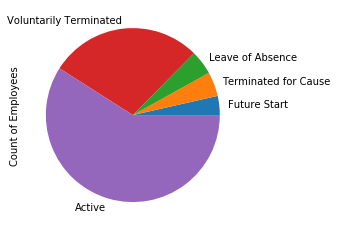

In [8]:
df_0.iloc[:5]['Count of Employees'].plot(kind='pie')
df_0

### Количество сотрудников по отделам
#### [Наверх к содержанию](#Содержание)

In [61]:
# Количество сотрудников по отделам
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """(SELECT department, COUNT("Employee Name") AS count_employee FROM hr_dataset GROUP BY department) UNION ALL (SELECT 'TOTAL' AS "Employee Name", COUNT("Employee Name") FROM hr_dataset) ORDER BY count_employee;"""
cursor.execute(sql_str)
# data_bases = [i for i in cursor.fetchall()]
data_bases = [a for a in cursor.fetchall()]
conn.commit()

df_1 = pd.DataFrame(columns=['Departament', 'Count of Employees'])

for item, raw in enumerate(data_bases):
    df_1.loc[item] = raw

df_1.index = df_1['Departament']
del df_1['Departament']

# Информация о руководителе
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()


sql_str = """SELECT * FROM hr_dataset WHERE department = 'Executive Office';"""
cursor.execute(sql_str)

data_bases = [a for a in cursor.fetchall()]
conn.commit()

df_2 = pd.DataFrame(columns=hr_dataset)

for item, raw in enumerate(data_bases):
    df_2.loc[item] = raw

Штат сотрудников распределен по шести департаментам. Самый многочисленный - производственный, 208 человек.

,Count of Employees
Departament,
Executive Office,1
Admin Offices,10
Software Engineering,10
Sales,31
IT/IS,50
Production,208
TOTAL,310


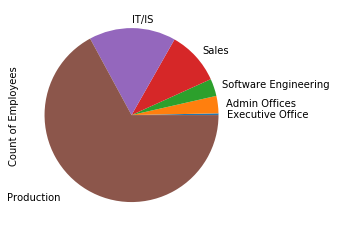

In [65]:
df_1[:6]['Count of Employees'].plot(kind='pie')
df_1

Меньше всего сотрудников в руководящем составе. Знакомтесь, Джанет Кинг - президент и СЕО компании с окладом 80, 63 летняя латиноамериканка, гражданин США, замужем.

In [11]:
df_2.transpose().iloc[pd.np.r_[1:2,9:12, 14:18, 25:26]]

,0
"(Employee Name,)","King, Janet"
"(age,)",63
"(Pay Rate,)",80
"(state,)",MA
"(sex,)",Female
"(maritaldesc,)",Married
"(citizendesc,)",US Citizen
"(Hispanic/Latino,)",Yes
"(position,)",President & CEO


### Средняя зарплата
#### [Наверх к содержанию](#Содержание)

In [12]:
# Средняя зарплата
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = 'SELECT round(CAST(AVG("Pay Rate") AS dec(12,2)),0) AS avg_pay_rate FROM hr_dataset;'
cursor.execute(sql_str)
# data_bases = [i for i in cursor.fetchall()]
avg_pay_rate = [a for a in cursor.fetchall()]
conn.commit()

print('Средняя зарплата в компании ', avg_pay_rate[0])

# Средняя зарплата по отделам
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = 'SELECT department, round(CAST(AVG("Pay Rate") AS dec(12,6)),0) AS avg_pay_rate FROM hr_dataset GROUP BY department ORDER BY avg_pay_rate DESC;'
cursor.execute(sql_str)

data_bases = [a for a in cursor.fetchall()]
conn.commit()

df_3 = pd.DataFrame(columns=['Departament', 'AVG pay rate'])

for item, raw in enumerate(data_bases):
    df_3.loc[item] = raw

df_3.index = df_3['Departament']
del df_3['Departament']

Средняя зарплата в компании  (Decimal('31'),)


В целом в компании средний оклад - 31. Наибольшее значение показателя принадлежит, что вполне ожидаемо, руководителю (80) и основному зарабатывающему подразделению - отделу продаж (56). Меньше всех получают сотрудники производственного отдела - 23.

,AVG pay rate
Departament,
Executive Office,80
Sales,56
Software Engineering,49
IT/IS,46
Admin Offices,32
Production,23


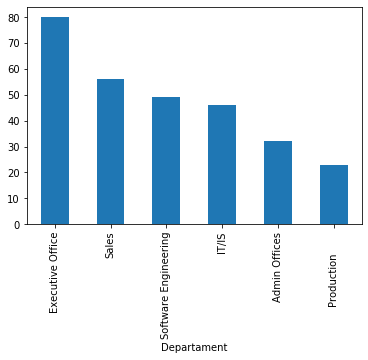

In [13]:
df_3['AVG pay rate'].apply(lambda x: int(x)).plot(kind='bar')
df_3

### Средний возраст
#### [Наверх к содержанию](#Содержание)

In [14]:
# Средний возраст
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = 'SELECT round(AVG("age"),0) AS avg_age FROM hr_dataset;'
cursor.execute(sql_str)
# data_bases = [i for i in cursor.fetchall()]
avg_age = [a for a in cursor.fetchall()]
conn.commit()

print(avg_age)

# Средний возраст по отделам
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = 'SELECT department, round(AVG("age"),0) AS avg_age FROM hr_dataset GROUP BY department ORDER BY avg_age DESC;'
cursor.execute(sql_str)
# data_bases = [i for i in cursor.fetchall()]
data_bases = [a for a in cursor.fetchall()]
conn.commit()

df_4 = pd.DataFrame(columns=['Departament', 'Avg age'])

for item, raw in enumerate(data_bases):
    df_4.loc[item] = raw

df_4.index = df_4['Departament']
del df_4['Departament']

[(Decimal('39'),)]


Средний возраст сотрудников в компании - 39 лет. В разрезе отделов - меньше всех лет сотрудникам из Admin Offices.
По остальным отделам (кроме руководства, где всего один человек) возраст 36-39 лет.

,Avg age
Departament,
Executive Office,63
Production,39
Sales,39
IT/IS,38
Software Engineering,36
Admin Offices,32


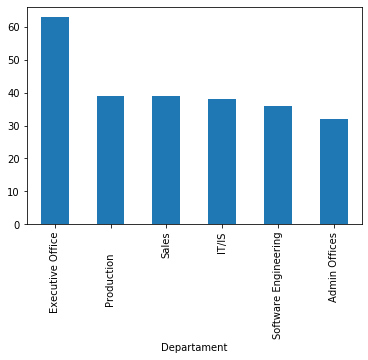

In [15]:
df_4['Avg age'].apply(lambda x: int(x)).plot(kind='bar')
df_4

### Средняя продолжительность работы
#### [Наверх к содержанию](#Содержание)

In [16]:
# Средний период работы
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = 'SELECT round(AVG("Days Employed"),0) AS avg_day_empl FROM hr_dataset;'
cursor.execute(sql_str)
# data_bases = [i for i in cursor.fetchall()]
avg_day_empl = [a for a in cursor.fetchall()]
conn.commit()

print(avg_day_empl)

# Средний период работы по отделам
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = 'SELECT department, round(AVG("Days Employed"),0) AS avg_day_empl FROM hr_dataset GROUP BY department ORDER BY avg_day_empl DESC;'
cursor.execute(sql_str)
# data_bases = [i for i in cursor.fetchall()]
data_bases = [a for a in cursor.fetchall()]
conn.commit()

df_5 = pd.DataFrame(columns=['Departament', 'Avg_day_empl'])

for item, raw in enumerate(data_bases):
    df_5.loc[item] = raw

df_5.index = df_5['Departament']
del df_5['Departament']

[(Decimal('1296'),)]


В среднем по компании каждый сотрудник отработал 1296 дней. Больше всего (кроме руководителя) работают в отделе продаж (другими словами, в главном "зарабатывающем" подразделении наименьшая "текучка", а это хорошо),
меньше  всего - IT/IS

,Avg_day_empl
Departament,
Executive Office,1973
Sales,1622
Admin Offices,1421
Software Engineering,1418
Production,1308
IT/IS,982


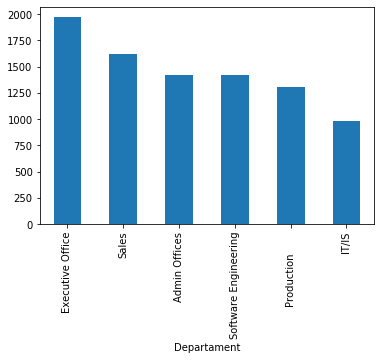

In [17]:
df_5['Avg_day_empl'].apply(lambda x: int(x)).plot(kind='bar')
df_5

### Распределение по полу
#### [Наверх к содержанию](#Содержание)

In [54]:
# Распределение полов по отделам
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str1 = """CREATE TEMP TABLE male AS SELECT department, COUNT(*) AS num_sex FROM hr_dataset  WHERE sex = 'Male' GROUP BY department ORDER BY department;"""
cursor.execute(sql_str1)

sql_str2 = """CREATE TEMP TABLE female AS SELECT department, COUNT(*) AS num_sex FROM hr_dataset  WHERE sex = 'Female' GROUP BY department ORDER BY department;"""
cursor.execute(sql_str2)

sql_str3 = """SELECT * FROM female JOIN male ON male.department = female.department;"""
# sql_str3 = """SELECT * FROM female;"""
cursor.execute(sql_str3)

data_bases = [a for a in cursor.fetchall()]

conn.commit()

df_6 = pd.DataFrame(columns=['Departament', 'Female', 'Male'])

for item, raw in enumerate(data_bases):
    df_6.loc[item] = [raw[0],raw[1],raw[3]]

df_6.index = df_6['Departament']
del df_6['Departament']

Как видно из графика, в производственном подразделении женщин больше, чем мужчин в 1,5 раза. В остальных - разница не столь заметна.

,Female,Male
Departament,,
Admin Offices,6,4
IT/IS,22,28
Production,127,81
Sales,15,16
Software Engineering,6,4


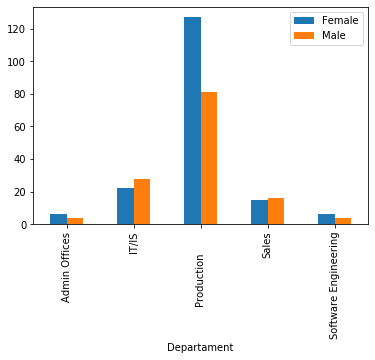

In [55]:
df_6.plot.bar()
df_6

### Семейное положение в разрезе полов
#### [Наверх к содержанию](#Содержание)

In [95]:
# Семейное положение
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str1 = """CREATE TEMP TABLE male AS SELECT maritaldesc, COUNT('Employee Name') AS count FROM hr_dataset WHERE sex = 'Male' GROUP BY maritaldesc ORDER BY count DESC;"""
cursor.execute(sql_str1) 

sql_str2 = """CREATE TEMP TABLE female AS SELECT maritaldesc, COUNT('Employee Name') AS count FROM hr_dataset WHERE sex = 'Female' GROUP BY maritaldesc ORDER BY count DESC;"""
cursor.execute(sql_str2) 

sql_str3 = """SELECT * FROM female JOIN male ON male.maritaldesc = female.maritaldesc;"""
cursor.execute(sql_str3) 

data_bases = [a for a in cursor.fetchall()]
conn.commit()

df_7 = pd.DataFrame(columns=['Maritaldesc', 'Male', 'Female'])

for item, raw in enumerate(data_bases):
    df_7.loc[item] = [raw[0],raw[1],raw[3]]

df_7.index = df_7['Maritaldesc']
del df_7['Maritaldesc']

Как видно по графику, и среди одиноких, и среди женатых мужчин больше, чем женщин

,Male,Female
Maritaldesc,,
Single,76,61
Married,72,51
Divorced,16,14
Separated,9,3
Widowed,4,4


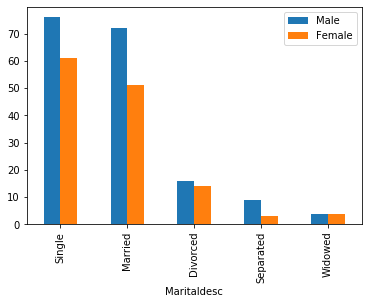

In [96]:
df_7.plot.bar()
df_7

## Анализ производственного департамента

### [Наверх к содержанию](#Содержание)

### Обзор подразделения

#### [Наверх к содержанию](#Содержание)

In [27]:
# Количество сотрудников по статусам
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """(SELECT "Employment Status" AS emp_status, COUNT("Employee Name") AS emp_name FROM production_staff WHERE NOT "Employment Status" IS NULL GROUP BY emp_status) UNION ALL (SELECT 'TOTAL' AS "Employee Name", COUNT("Employee Name") AS emp_name FROM production_staff WHERE NOT "Employment Status" IS NULL) ORDER BY emp_name;"""
cursor.execute(sql_str)

data_bases = [a for a in cursor.fetchall()]
conn.commit()

df_8 = pd.DataFrame(columns=['Employment Status', 'Count of Employees'])

for item, raw in enumerate(data_bases):
    df_8.loc[item] = raw

df_8.index = df_8['Employment Status']
del df_8['Employment Status']

#Что производят
production_staff[12]

('Abutments/Hour Wk 1',)

#### [Наверх к содержанию](#Содержание)

Производственное подразделение компании занимается выпуском абатментов. База данных по подразделению содержит 209 сотрудников, из которых: 107 - работающие, в отпусках - 11, стажеры - 8, уволившиеся по собственному желанию - 75, уволившиеся по прочим причинам - 8.

,Count of Employees
Employment Status,
Future Start,8
Terminated for Cause,8
Leave of Absence,11
Voluntarily Terminated,75
Active,107
TOTAL,209


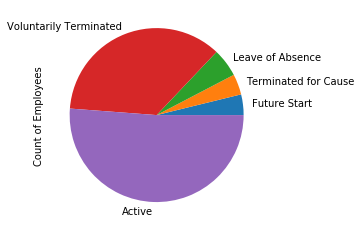

In [31]:
df_8.iloc[:5]['Count of Employees'].plot(kind='pie')
df_8

In [96]:
# Расы сотрудников
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str1 = """CREATE TEMP TABLE percent_race AS SELECT "Race Desc" AS race_desc, COUNT("Race Desc") AS count_race FROM production_staff WHERE NOT "Race Desc" IS NULL GROUP BY race_desc ORDER BY count_race DESC;"""
cursor.execute(sql_str1)

sql_str2 = """SELECT race_desc, ROUND(100*count_race/SUM(count_race) OVER()) AS percent FROM percent_race;"""
cursor.execute(sql_str2)

data_bases = [a for a in cursor.fetchall()]
conn.commit()

df_9 = pd.DataFrame(columns=['race_desc', '%'])

for item, raw in enumerate(data_bases):
    df_9.loc[item] = raw

df_9.index = df_9['race_desc']
del df_9['race_desc']

#### [Наверх к содержанию](#Содержание)

Больше всего - 67% -  работников из базы данных - "белой" расы, меньше всего - 1% - латиноамериканцев.

,%
race_desc,
White,67
Black or African American,15
Asian,11
Two or more races,5
American Indian or Alaska Native,1
Hispanic,1


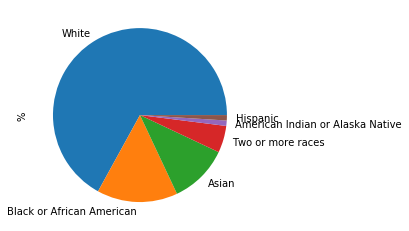

In [107]:
df_9['%'].apply(lambda x: int(x)).plot(kind='pie')
df_9

In [153]:
# Должности со средним окладом
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()
#WHERE NOT Position IS NULL
sql_str1 = """SELECT "Position", SUM("Pay")/COUNT("Pay") AS YY FROM production_staff WHERE NOT "Position" IS NULL GROUP BY "Position";"""
cursor.execute(sql_str1)


data_bases = [a for a in cursor.fetchall()]
conn.commit()

df_10 = pd.DataFrame(columns=['Position', 'Avg Pay'])

for item, raw in enumerate(data_bases):
    df_10.loc[item] = raw

df_10.index = df_10['Position']
del df_10['Position']

#### [Наверх к содержанию](#Содержание)

Сотрудники производственного отдела занимают следующие должности со средним окладом:

,Avg Pay
Position,
Production Manager,$49.60
Production Technician II,$25.43
Production Technician I,$19.13


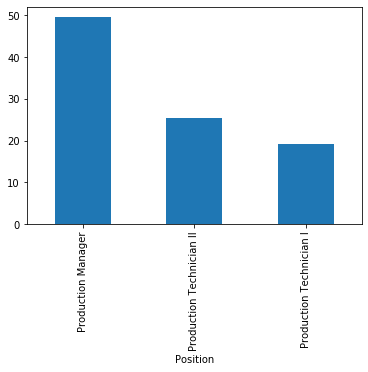

In [154]:
df_10['Avg Pay'].apply(lambda x: float(x[1:])).plot.bar()
df_10

### Влияние пола сотрудника на производительность

#### [Наверх к содержанию](#Содержание)

In [105]:
#Эффективность сотрудников производственного отдела будем оценивать по двум показателям:
# производство абатментов в час;
# зарплата (часовая) в расчете на один производимый абатмент

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# sql_str1 = """CREATE TEMP TABLE prod AS SELECT "Employee Name" AS name, "Abutments/Hour Wk 1" AS Abutments_Hour_Wk_1, "Abutments/Hour Wk 2" AS Abutments_Hour_Wk_2, "Daily Error Rate" AS day_error, "90-day Complaints" AS _90_day_Complaints FROM production_staff;"""
# cursor.execute(sql_str1)

# sql_str2 = """CREATE TEMP TABLE hr AS SELECT "Employee Name" AS name, age, "Pay Rate" AS pay_rate, state, sex, maritaldesc, citizendesc, racedesc, "Date of Hire" AS date_hire, "Days Employed" AS days_empl, "Date of Termination" AS date_termination, "Reason For Term" AS reason_term, "Employment Status" AS empl_status, department, position, "Manager Name" AS manager, "Employee Source" AS empl_source, "Performance Score" AS score FROM hr_dataset;"""
# cursor.execute(sql_str2)

# sql_str3 = """SELECT * FROM prod JOIN hr ON prod.name = hr.name;"""
# cursor.execute(sql_str3)

#Из таблицы production_staff выберем строки с должностями, именами, показателями производства абатментов за 1 и 2 недели
#также добавим столбец со средним значением абатментов за две недели по каждому сотруднику
#также добавим столбец с зарплатой в расчете на один производимый абатмент
#выборка включает в себя только сотрудников с должностями Production Technician (I и II)
#Результат сохраним во временную таблицу
sql_str1 = """CREATE TEMP TABLE prod AS SELECT "Position","Employee Name" AS name, "Abutments/Hour Wk 1" AS Abutments_Hour_Wk_1, "Abutments/Hour Wk 2" AS Abutments_Hour_Wk_2, ("Abutments/Hour Wk 1" + "Abutments/Hour Wk 2")/2 AS avg_abut_hour, "Pay", ("Pay"/(("Abutments/Hour Wk 1" + "Abutments/Hour Wk 2")/2)) AS pay_abut FROM production_staff WHERE "Abutments/Hour Wk 1" <> 0 AND ("Position" = 'Production Technician I' OR "Position" = 'Production Technician II');"""
cursor.execute(sql_str1)

#Из таблицы hr_dataset выберем данные по полу сотрудников. Результат - во временную таблицу
sql_str2 = """CREATE TEMP TABLE hr AS SELECT "Employee Name" AS name1, sex FROM hr_dataset;"""
cursor.execute(sql_str2)

#Заджойним временные таблицы по именам. Результат - также во временную таблицу
sql_str3 = """CREATE TEMP TABLE join_tab AS SELECT * FROM prod JOIN hr ON prod.name = hr.name1;"""
cursor.execute(sql_str3)

#Из последней таблицы получим средние значения производства абатментов, средней зарплаты на абатмент в разрезе пола сотрудников
sql_str4 = """SELECT sex, ROUND(AVG(avg_abut_hour),2) AS mean_abut_hour, ROUND(AVG(pay_abut::numeric),2) FROM join_tab GROUP BY sex;"""
cursor.execute(sql_str4)

data_bases = [a for a in cursor.fetchall()]
conn.commit()

df_11 = pd.DataFrame(columns=['Sex', 'Mean_Abutments_Hour, pieces', 'Salary_for_one_abutment, $'])

for item, raw in enumerate(data_bases):
    df_11.loc[item] = raw
df_11.index = df_11['Sex']
del df_11['Sex']

#### [Наверх к содержанию](#Содержание)

Хотя на графике отличия еле уловимы, по цифровым данным видно, что мужчины производят в среднем больше продукции, а также "расход" зарплаты на единицу продукции для предприятия меньше, чем то же для женщин.

,"Mean_Abutments_Hour, pieces","Salary_for_one_abutment, $"
Sex,,
Female,10.21,2.53
Male,10.32,2.38


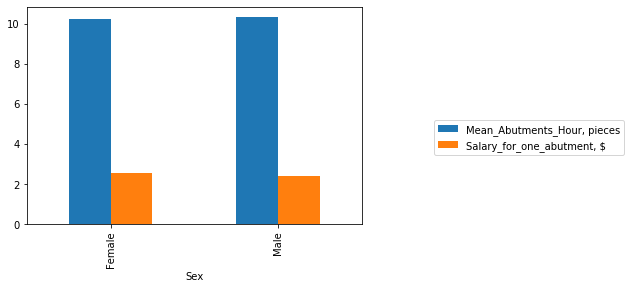

In [106]:
df_11.apply(pd.to_numeric).plot.bar().legend(bbox_to_anchor=(1.2, 0.5))
df_11

### Влияние семейного положения на производительность

#### [Наверх к содержанию](#Содержание)

In [107]:
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

#Из таблицы production_staff выберем строки с должностями, именами, показателями производства абатментов за 1 и 2 недели
#также добавим столбец со средним значением абатментов за две недели по каждому сотруднику
#также добавим столбец с зарплатой в расчете на один производимый абатмент
#выборка включает в себя только сотрудников с должностями Production Technician (I и II)
#Результат сохраним во временную таблицу
sql_str1 = """CREATE TEMP TABLE prod AS SELECT "Position","Employee Name" AS name, "Abutments/Hour Wk 1" AS Abutments_Hour_Wk_1, "Abutments/Hour Wk 2" AS Abutments_Hour_Wk_2, ("Abutments/Hour Wk 1" + "Abutments/Hour Wk 2")/2 AS avg_abut_hour, "Pay", ("Pay"/(("Abutments/Hour Wk 1" + "Abutments/Hour Wk 2")/2)) AS pay_abut FROM production_staff WHERE "Abutments/Hour Wk 1" <> 0 AND ("Position" = 'Production Technician I' OR "Position" = 'Production Technician II');"""
cursor.execute(sql_str1)

#Из таблицы hr_dataset выберем данные по семейному положению сотрудников. Результат - во временную таблицу
sql_str2 = """CREATE TEMP TABLE hr AS SELECT "Employee Name" AS name1, maritaldesc FROM hr_dataset;"""
cursor.execute(sql_str2)

#Заджойним временные таблицы по именам. Результат - также во временную таблицу
sql_str3 = """CREATE TEMP TABLE join_tab AS SELECT * FROM prod JOIN hr ON prod.name = hr.name1;"""
cursor.execute(sql_str3)

#Из последней таблицы получим средние значения производства абатментов, средней зарплаты на абатмент в разрезе семейного положения сотрудников
sql_str4 = """SELECT maritaldesc, ROUND(AVG(avg_abut_hour),2) AS mean_abut_hour, ROUND(AVG(pay_abut::numeric),2) FROM join_tab GROUP BY maritaldesc ORDER BY mean_abut_hour;"""
cursor.execute(sql_str4)

data_bases = [a for a in cursor.fetchall()]
conn.commit()

df_12 = pd.DataFrame(columns=['Maritaldesc', 'Mean_Abutments_Hour, pieces', 'Salary_for_one_abutment, $'])

for item, raw in enumerate(data_bases):
    df_12.loc[item] = raw
df_12.index = df_12['Maritaldesc']
del df_12['Maritaldesc']

#### [Наверх к содержанию](#Содержание)

Визуально видно, что разведенные сотрудники производят в среднем больше продукции, а также "расход" зарплаты этой категории на единицу продукции для предприятия меньше, чем то же для остальных категорий по семейному положению.

,"Mean_Abutments_Hour, pieces","Salary_for_one_abutment, $"
Maritaldesc,,
Married,9.70,2.78
Widowed,10.00,2.20
Single,10.37,2.36
Separated,11.11,2.53
Divorced,11.43,1.92


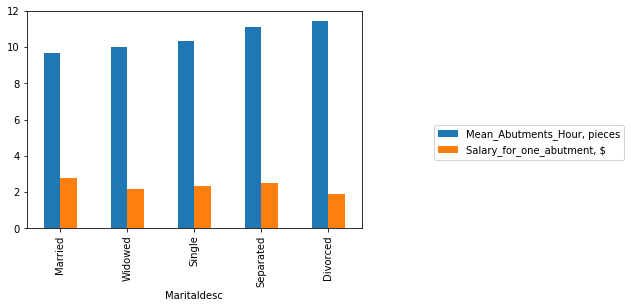

In [108]:
df_12.apply(pd.to_numeric).plot.bar().legend(bbox_to_anchor=(1.2, 0.5))
df_12

### Влияние наличия гражданства на производительность

#### [Наверх к содержанию](#Содержание)

In [109]:
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

#Из таблицы production_staff выберем строки с должностями, именами, показателями производства абатментов за 1 и 2 недели
#также добавим столбец со средним значением абатментов за две недели по каждому сотруднику
#также добавим столбец с зарплатой в расчете на один производимый абатмент
#выборка включает в себя только сотрудников с должностями Production Technician (I и II)
#Результат сохраним во временную таблицу
sql_str1 = """CREATE TEMP TABLE prod AS SELECT "Position","Employee Name" AS name, "Abutments/Hour Wk 1" AS Abutments_Hour_Wk_1, "Abutments/Hour Wk 2" AS Abutments_Hour_Wk_2, ("Abutments/Hour Wk 1" + "Abutments/Hour Wk 2")/2 AS avg_abut_hour, "Pay", ("Pay"/(("Abutments/Hour Wk 1" + "Abutments/Hour Wk 2")/2)) AS pay_abut FROM production_staff WHERE "Abutments/Hour Wk 1" <> 0 AND ("Position" = 'Production Technician I' OR "Position" = 'Production Technician II');"""
cursor.execute(sql_str1)

#Из таблицы hr_dataset выберем данные по гражданству сотрудников. Результат - во временную таблицу
sql_str2 = """CREATE TEMP TABLE hr AS SELECT "Employee Name" AS name1, citizendesc FROM hr_dataset;"""
cursor.execute(sql_str2)

#Заджойним временные таблицы по именам. Результат - также во временную таблицу
sql_str3 = """CREATE TEMP TABLE join_tab AS SELECT * FROM prod JOIN hr ON prod.name = hr.name1;"""
cursor.execute(sql_str3)

#Из последней таблицы получим средние значения производства абатментов, средней зарплаты на абатмент в разрезе гражданства сотрудников
sql_str4 = """SELECT citizendesc, ROUND(AVG(avg_abut_hour),2) AS mean_abut_hour, ROUND(AVG(pay_abut::numeric),2) FROM join_tab GROUP BY citizendesc ORDER BY mean_abut_hour;"""
cursor.execute(sql_str4)

data_bases = [a for a in cursor.fetchall()]
conn.commit()

df_13 = pd.DataFrame(columns=['Citizendesc', 'Mean_Abutments_Hour, pieces', 'Salary_for_one_abutment, $'])

for item, raw in enumerate(data_bases):
    df_13.loc[item] = raw
df_13.index = df_13['Citizendesc']
del df_13['Citizendesc']

#### [Наверх к содержанию](#Содержание)

Визуально видно, что сотрудники без гражданства производят в среднем меньше продукции, а также "расход" зарплаты этой категории на единицу продукции для предприятия больше, чем то же для остальных категорий по наличию гражданства.

,"Mean_Abutments_Hour, pieces","Salary_for_one_abutment, $"
Citizendesc,,
Non-Citizen,8.00,3.26
US Citizen,10.28,2.46
Eligible NonCitizen,10.43,2.36


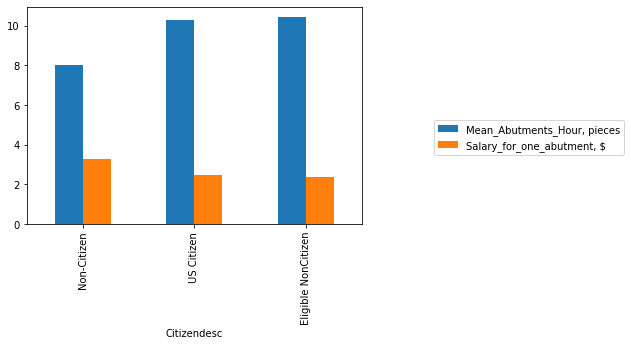

In [110]:
df_13.apply(pd.to_numeric).plot.bar().legend(bbox_to_anchor=(1.2, 0.5))
df_13

### Влияние расовой принадлежности на производительность

#### [Наверх к содержанию](#Содержание)

In [111]:
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

#Из таблицы production_staff выберем строки с должностями, именами, показателями производства абатментов за 1 и 2 недели
#также добавим столбец со средним значением абатментов за две недели по каждому сотруднику
#также добавим столбец с зарплатой в расчете на один производимый абатмент
#выборка включает в себя только сотрудников с должностями Production Technician (I и II)
#Результат сохраним во временную таблицу
sql_str1 = """CREATE TEMP TABLE prod AS SELECT "Position","Employee Name" AS name, "Abutments/Hour Wk 1" AS Abutments_Hour_Wk_1, "Abutments/Hour Wk 2" AS Abutments_Hour_Wk_2, ("Abutments/Hour Wk 1" + "Abutments/Hour Wk 2")/2 AS avg_abut_hour, "Pay", ("Pay"/(("Abutments/Hour Wk 1" + "Abutments/Hour Wk 2")/2)) AS pay_abut FROM production_staff WHERE "Abutments/Hour Wk 1" <> 0 AND ("Position" = 'Production Technician I' OR "Position" = 'Production Technician II');"""
cursor.execute(sql_str1)

#Из таблицы hr_dataset выберем данные по расовой принадледности сотрудников. Результат - во временную таблицу
sql_str2 = """CREATE TEMP TABLE hr AS SELECT "Employee Name" AS name1, racedesc FROM hr_dataset;"""
cursor.execute(sql_str2)

#Заджойним временные таблицы по именам. Результат - также во временную таблицу
sql_str3 = """CREATE TEMP TABLE join_tab AS SELECT * FROM prod JOIN hr ON prod.name = hr.name1;"""
cursor.execute(sql_str3)

#Из последней таблицы получим средние значения производства абатментов, средней зарплаты на абатмент в разрезе гражданства сотрудников
sql_str4 = """SELECT racedesc, ROUND(AVG(avg_abut_hour),2) AS mean_abut_hour, ROUND(AVG(pay_abut::numeric),2) FROM join_tab GROUP BY racedesc ORDER BY mean_abut_hour;"""
cursor.execute(sql_str4)

data_bases = [a for a in cursor.fetchall()]
conn.commit()

df_14 = pd.DataFrame(columns=['Racedesc', 'Mean_Abutments_Hour, pieces', 'Salary_for_one_abutment, $'])

for item, raw in enumerate(data_bases):
    df_14.loc[item] = raw
df_14.index = df_14['Racedesc']
del df_14['Racedesc']

#### [Наверх к содержанию](#Содержание)

Визуально видно, что коренные жители Америки или Аляски производят в среднем больше продукции, а также "расход" зарплаты этой категории на единицу продукции для предприятия меньше, чем то же для остальных категорий.

,"Mean_Abutments_Hour, pieces","Salary_for_one_abutment, $"
Racedesc,,
Hispanic,8.50,2.60
Black or African American,9.21,2.98
Two or more races,9.60,2.63
White,10.40,2.41
Asian,10.55,2.19
American Indian or Alaska Native,15.33,1.50


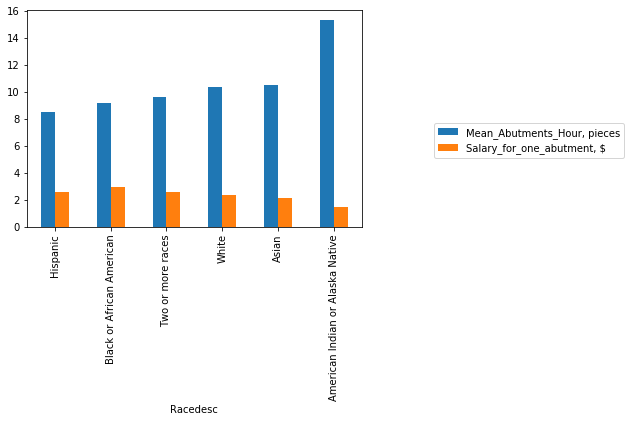

In [112]:
df_14.apply(pd.to_numeric).plot.bar().legend(bbox_to_anchor=(1.2, 0.5))
df_14

### Влияние источника вакансии на производительность

#### [Наверх к содержанию](#Содержание)

In [113]:
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

#Из таблицы production_staff выберем строки с должностями, именами, показателями производства абатментов за 1 и 2 недели
#также добавим столбец со средним значением абатментов за две недели по каждому сотруднику
#также добавим столбец с зарплатой в расчете на один производимый абатмент
#выборка включает в себя только сотрудников с должностями Production Technician (I и II)
#Результат сохраним во временную таблицу
sql_str1 = """CREATE TEMP TABLE prod AS SELECT "Position","Employee Name" AS name, "Abutments/Hour Wk 1" AS Abutments_Hour_Wk_1, "Abutments/Hour Wk 2" AS Abutments_Hour_Wk_2, ("Abutments/Hour Wk 1" + "Abutments/Hour Wk 2")/2 AS avg_abut_hour, "Pay", ("Pay"/(("Abutments/Hour Wk 1" + "Abutments/Hour Wk 2")/2)) AS pay_abut FROM production_staff WHERE "Abutments/Hour Wk 1" <> 0 AND ("Position" = 'Production Technician I' OR "Position" = 'Production Technician II');"""
cursor.execute(sql_str1)

#Из таблицы hr_dataset выберем данные по источнику вакансии. Результат - во временную таблицу
sql_str2 = """CREATE TEMP TABLE hr AS SELECT "Employee Name" AS name1, "Employee Source" AS empl_source FROM hr_dataset;"""
cursor.execute(sql_str2)

#Заджойним временные таблицы по именам. Результат - также во временную таблицу
sql_str3 = """CREATE TEMP TABLE join_tab AS SELECT * FROM prod JOIN hr ON prod.name = hr.name1;"""
cursor.execute(sql_str3)

#Из последней таблицы получим средние значения производства абатментов, средней зарплаты на абатмент в разрезе источников вакансии
sql_str4 = """SELECT empl_source, ROUND(AVG(avg_abut_hour),2) AS mean_abut_hour, ROUND(AVG(pay_abut::numeric),2) FROM join_tab GROUP BY empl_source ORDER BY mean_abut_hour;"""
cursor.execute(sql_str4)

data_bases = [a for a in cursor.fetchall()]
conn.commit()

df_15 = pd.DataFrame(columns=['Empl_source', 'Mean_Abutments_Hour, pieces', 'Salary_for_one_abutment, $'])

for item, raw in enumerate(data_bases):
    df_15.loc[item] = raw
df_15.index = df_15['Empl_source']
del df_15['Empl_source']

#### [Наверх к содержанию](#Содержание)

Визуально видно, наилучшее соотношение производительности труда и расходов зарплаты на единицу продукции у сотрудников, "пришедших" с сайта monster.com и с веб-приложения.

,"Mean_Abutments_Hour, pieces","Salary_for_one_abutment, $"
Empl_source,,
Pay Per Click,5.00,3.00
Careerbuilder,7.00,3.71
Other,7.50,3.28
Website Banner Ads,9.00,2.16
Internet Search,9.00,2.28
Employee Referral,9.23,2.94
Vendor Referral,9.25,2.73
Word of Mouth,9.31,3.10
Social Networks - Facebook Twitter etc,9.44,2.30


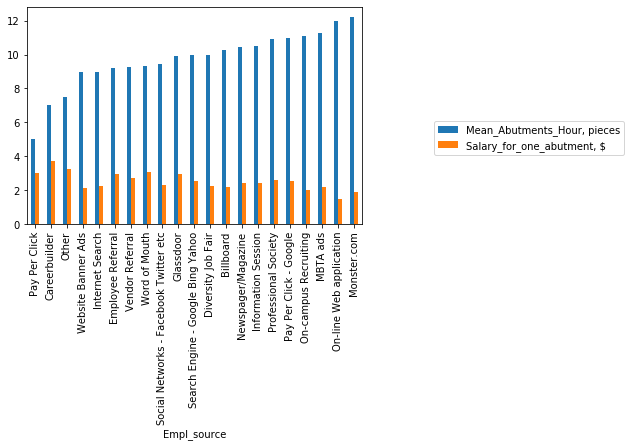

In [114]:
df_15.apply(pd.to_numeric).plot.bar().legend(bbox_to_anchor=(1.2, 0.5))
df_15

### Рекомендации по набору персонала

#### [Наверх к содержанию](#Содержание)

Следующие характеристики кандидата вероятно положительным образом скажутся на производительности труда - мужчина, в разводе, гражданин США или в статусе иммигранта, коренной житель Америки/Аляски, откликнувшийся с сайта monster.com. Таким образом, при прочих равных условиях вышеописанные характеристики могут сыграть превалирующую роль в выборе того или иного кандидата.

### Рекомендации по работе с текущим персоналом

#### [Наверх к содержанию](#Содержание)

In [129]:
#Посмотрим, как соотносятся между собой оценки производительности (Exceeds Exceptional Fully_Meets PIP Needs_Improvement)
#и среднние значения по производству абатментов, сгруппированные по менеджерам.
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

#Из таблицы production_staff выберем строки с менеджерами, оценкой, показателями производства абатментов за 1 и 2 недели
#также добавим столбец со средним значением абатментов за две недели по каждому сотруднику
#выборка включает в себя только сотрудников с должностями Production Technician (I и II)
#Результат сохраним во временную таблицу
sql_str1 = """CREATE TEMP TABLE prod AS SELECT "Manager Name" AS manager, "Performance Score" AS score, "Position", "Abutments/Hour Wk 1" AS Abutments_Hour_Wk_1, "Abutments/Hour Wk 2" AS Abutments_Hour_Wk_2, ("Abutments/Hour Wk 1" + "Abutments/Hour Wk 2")/2 AS avg_abut_hour FROM production_staff WHERE "Abutments/Hour Wk 1" <> 0 AND ("Position" = 'Production Technician I' OR "Position" = 'Production Technician II');"""
cursor.execute(sql_str1)

# создадим временную таблицу, содержащую среднее количество производимых абатментов на сотрудника с оценкой exceeds в разрезе менеджеров
sql_str2 = """CREATE TEMP TABLE exceeds AS SELECT manager, ROUND(AVG(avg_abut_hour),2) AS mean_abut_hour FROM prod WHERE score = 'Exceeds' GROUP BY manager;"""
cursor.execute(sql_str2)

# такая же по оценке exceptional
sql_str3 = """CREATE TEMP TABLE exceptional AS SELECT manager, ROUND(AVG(avg_abut_hour),2) AS mean_abut_hour FROM prod WHERE score = 'Exceptional' GROUP BY manager;"""
cursor.execute(sql_str3)

# такая же по оценке fully_meets
sql_str4 = """CREATE TEMP TABLE fully_meets AS SELECT manager, ROUND(AVG(avg_abut_hour),2) AS mean_abut_hour FROM prod WHERE score = 'Fully Meets' GROUP BY manager;"""
cursor.execute(sql_str4)

# такая же по оценке pip
sql_str5 = """CREATE TEMP TABLE pip AS SELECT manager, ROUND(AVG(avg_abut_hour),2) AS mean_abut_hour FROM prod WHERE score = 'PIP' GROUP BY manager;"""
cursor.execute(sql_str5)

# такая же по оценке needs_improvement
sql_str6 = """CREATE TEMP TABLE needs_improvement AS SELECT manager, ROUND(AVG(avg_abut_hour),2) AS mean_abut_hour FROM prod WHERE score = 'Needs Improvement' GROUP BY manager;"""
cursor.execute(sql_str6)

# соединим результаты прошлый таблиц в одну
sql_str7 = """SELECT * FROM exceeds FULL JOIN exceptional ON exceptional.manager = exceeds.manager FULL JOIN fully_meets ON fully_meets.manager = exceeds.manager FULL JOIN pip ON pip.manager = exceeds.manager FULL JOIN needs_improvement ON needs_improvement.manager = exceeds.manager;"""
cursor.execute(sql_str7)

data_bases = [a for a in cursor.fetchall()]
conn.commit()

df_16 = pd.DataFrame(columns=['Manager', 'Exceeds', 'Manager2', 'Exceptional', 'Manager3', 'Fully_Meets', 'Manager4', 'PIP', 'Manager5', 'Needs_Improvement'])

for item, raw in enumerate(data_bases):
    df_16.loc[item] = raw
df_16.index = df_16['Manager']
del df_16['Manager']
del df_16['Manager2']
del df_16['Manager3']
del df_16['Manager4']
del df_16['Manager5']

#### [Наверх к содержанию](#Содержание)

По графику визуально заметно, что в командах некоторых менеджеров присутствуют перекосы между показателями Performance Score и производительностью труда (среднее количество производимых абатментов в час на сотрудника). Например у менеджера Brannon Miller есть подчиненные с оценкой PIP (план улучшения производительности), производящие в среднем 12,5 единиц продукции, что больше чем в группах с оценкой Exceptional и Fully_Meets. Таким образом, план улучшения производительности выполнен и по таким сотрудникам необходимо пересмотреть Performance Score в сторону улучшения. Такая же картина в группе у Michael Albert.
Ketsia Liebig - в группе у этого менеджера сотрудники с оценкой Needs_Improvement (требуется улучшение) производят больше, чем в группах с оценкой Exceeds и Fully_Meets.
Общая рекомендация - по вышеуказанным менеджерам необходима переоценка по Performance Score сотрудников.

,Exceeds,Exceptional,Fully_Meets,PIP,Needs_Improvement
Manager,,,,,
Amy Dunn,16.50,19.00,11.27,3.00,None
Brannon Miller,14.60,10.50,9.75,12.50,3.00
David Stanley,9.00,None,11.20,None,None
Elijiah Gray,11.50,None,10.86,None,7.00
Kelley Spirea,8.67,None,10.40,None,None
Ketsia Liebig,13.50,None,9.36,None,18.00
Kissy Sullivan,15.00,11.00,10.62,3.00,4.00
Michael Albert,17.00,None,11.40,13.00,5.67
Webster Butler,14.50,None,10.73,None,4.50


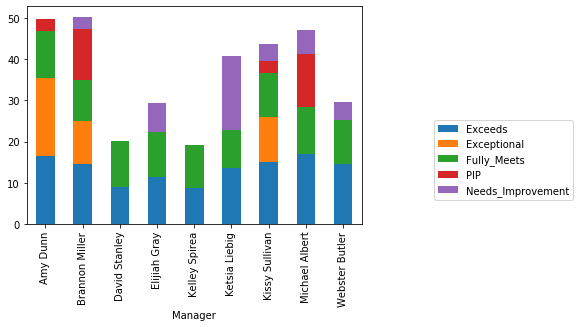

In [140]:
df_16.apply(pd.to_numeric).plot(kind='bar',stacked=True).legend(bbox_to_anchor=(1.2, 0.5))
df_16

## Анализ расходов на подбор персонала

### [Наверх к содержанию](#Содержание)

In [335]:
#Посмотрим годовые расходы на рекрутинг в расчете на одного сотрудника
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()
# 
sql_str1 = """CREATE TEMP TABLE employee_source AS SELECT
COUNT(*) AS name, 
"Employee Source" AS employee_source 
FROM hr_dataset 
GROUP BY "Employee Source";"""
cursor.execute(sql_str1)

sql_str2 = """CREATE TEMP TABLE rec_costs AS SELECT 
"Employment Source" AS employee_source11, 
"Total" 
FROM recruiting_costs;"""
cursor.execute(sql_str2)

sql_str3 = """CREATE TEMP TABLE join_costs AS SELECT * FROM employee_source
RIGHT JOIN rec_costs ON rec_costs.employee_source11 = employee_source.employee_source;"""
cursor.execute(sql_str3)

sql_str4 = """SELECT name, employee_source, "Total", "Total"/name AS total_ed  FROM join_costs ORDER BY total_ed DESC;"""
cursor.execute(sql_str4)

data_bases = [a for a in cursor.fetchall()]
conn.commit()

df_17 = pd.DataFrame(columns=['number_of_employees', 'employee_source','recruiting_costs', 'recruiting_costs_of_one'])

for item, raw in enumerate(data_bases):
    df_17.loc[item] = raw
df_17.index = df_17['employee_source']
del df_17['employee_source']
df_17

,number_of_employees,recruiting_costs,recruiting_costs_of_one
employee_source,,,
Careerbuilder,1,7790,7790
Pay Per Click,1,1323,1323
MBTA ads,17,10980,645
On-campus Recruiting,12,7500,625
Website Banner Ads,13,7143,549
Social Networks - Facebook Twitter etc,11,5573,506
Newspager/Magazine,18,8291,460
Other,9,3995,443
Billboard,16,6192,387


При соотнесении двух графиков ниже, видно, что наиболее эффективными (с точки зрения количества привлеченного персонала и расходов в расчете на одного привлеченного специалиста) каналами привлечения сотрудников оказались средние по расходам: Billboard,  Diversity Job Fair, Monster.com, Search Engine - Google Bing Yahoo, Pay Per Click - Google, Professional Society. Некоторые "бесплатные" способы поиска сотрудников оказались не менее эффективными, чем более дорогие "аналоги" - Employee Referral, Vendor Referral, Glassdoor, Word of Mouth.
Рекомендация сводится к следующему: пересмотреть расходы на рекрутинг, т.е. сократить работу с дорогими и неэффективными каналами поиска сотрудников - MBTA ads, MBTA ads, On-campus Recruiting, Website Banner Ads, Social Networks - Facebook Twitter etc, Newspager/Magazine.

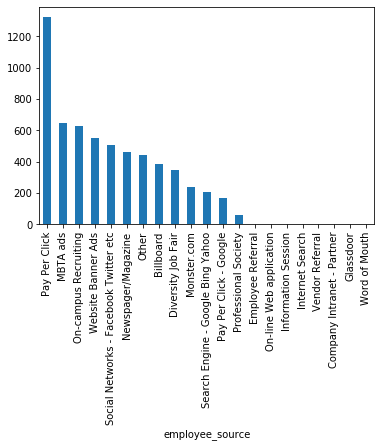

In [333]:
#Годовые расходы на рекрутинг в расчете на одного привлеченного сотрудника
df_17[1:].recruiting_costs_of_one.plot(kind='bar',stacked=True)

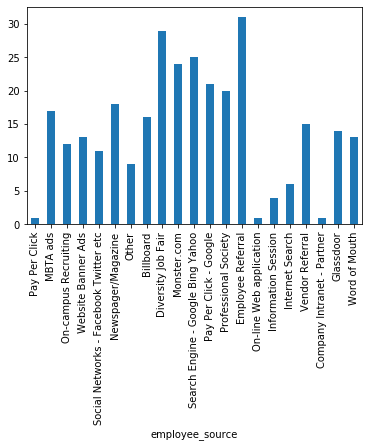

In [334]:
#Количество привлеченных сотрудников
df_17[1:].number_of_employees.plot(kind='bar',stacked=True)

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://nbviewer.jupyter.org/github/vikaborel/dstutorials/blob/master/Дополнительные%20инструкции.ipynb).

In [0]:
### YOUR CODE HERE ###


